### Predicting the Price of Microsoft Stock

This class will look to build an ARIMA(p, d, q) model from a history of Microsoft's stock price.

##### Step 1:  Load in the data set

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import acf, acovf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

import warnings
warnings.simplefilter('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

df = pd.read_csv('../data/msft.csv', index_col = 'Date', parse_dates = True)

In [4]:
df.head()

,Close
Date,
1986-03-01,0.095486
1986-04-01,0.111979
1986-05-01,0.121528
1986-06-01,0.106771
1986-07-01,0.098958


In [32]:
df.tail()

,Close
Date,
2019-05-01,123.680000
2019-06-01,133.960007
2019-07-01,136.270004
2019-08-01,136.130005
2019-08-16,136.130005


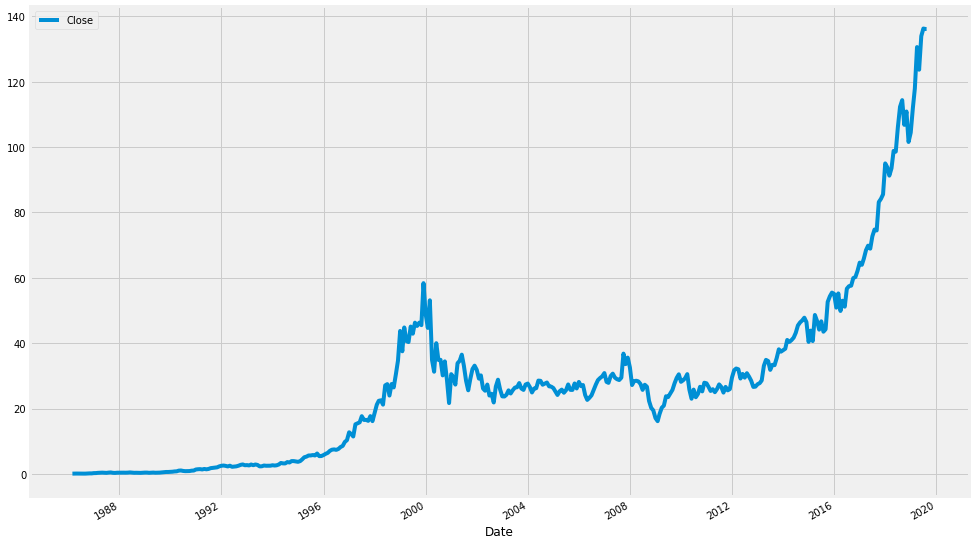

In [5]:
df.plot(figsize = (15,10));

##### Step 2:  Turn It Into A Stationary Time Series (You can do the same process that was used before)

In [11]:
df_stationary = np.log(df).diff()

##### Step 3:  Plot the new Time Series, as well as the autocorrelation_plot in pandas

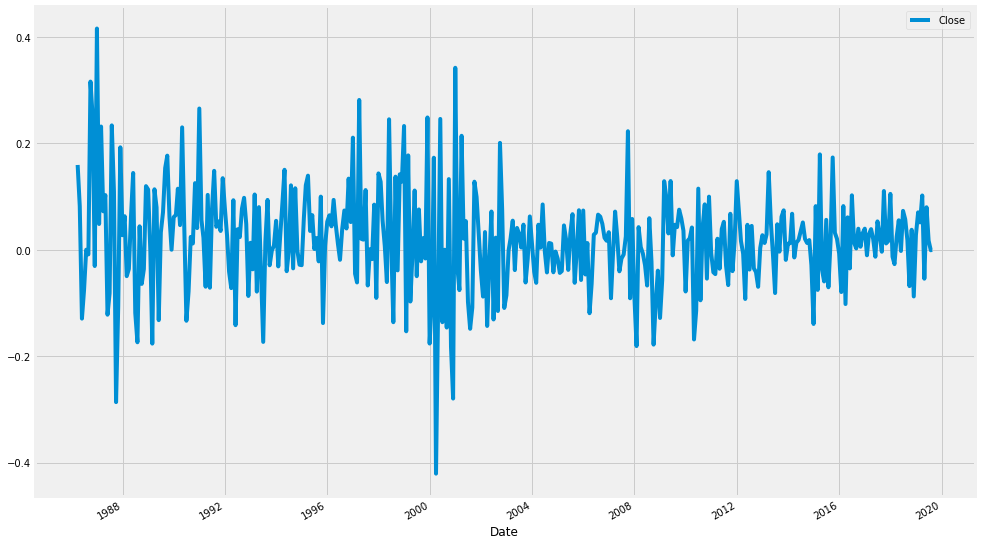

In [12]:
df_stationary.plot(figsize = (15,10));

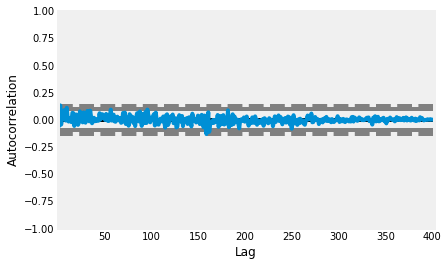

In [34]:
autocorrelation_plot(df_stationary[1:]);

##### Step 4:  Using statsmodels, grab the acf and pacf plots to get an idea of what your p and q terms will be

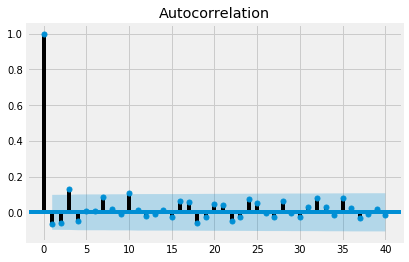

In [15]:
x = plot_acf(df_stationary[1:], lags = 40)

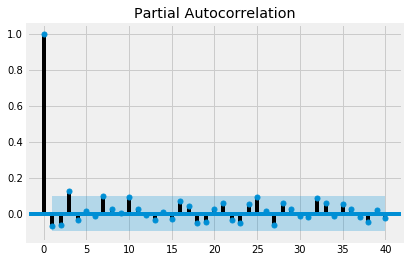

In [17]:
y = plot_pacf(df_stationary[1:], lags = 40)

##### Step 5: Fit the Model

In [41]:
model = ARIMA(np.log(df['Close']), order = (2,1,1))
results = model.fit()

##### Step 6:  Pull Its Summary

In [42]:
print(results.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  402
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 381.416
Method:                       css-mle   S.D. of innovations              0.094
Date:                Mon, 26 Aug 2019   AIC                           -752.831
Time:                        20:16:05   BIC                           -732.849
Sample:                             1   HQIC                          -744.920
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0180      0.004      4.309      0.000       0.010       0.026
ar.L1.D.Close    -0.7591      0.148     -5.114      0.000      -1.050      -0.468
ar.L2.D.Close    -0.1394      0.050     

##### Step 7:  What Are the Final Parameters of Your Model?

Write them down on your nameplate!

##### Step 8:  What Is The Predicted Stock Price in 3 Months Time? (Convert the price back to dollars)

In [45]:
results.forecast(steps = 3)[0][2]

4.965945710590397

In [46]:
np.exp(results.forecast(steps = 3)[0][2])

143.44414279256674

Write down your results on your nameplate

##### Step 9:  What Is The 95% Confidence Interval?

In [47]:
np.exp(results.forecast(steps = 3)[2][2])

array([106.70362175, 192.83527367])

Write down your results on your nameplate.